In [19]:
import pandas as pd
import matplotlib.pyplot as mp
import os

def get_newest_csv_file(dir_path):
    csv_files = []
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            csv_files.append(file)
    if not csv_files:
        return None
    newest_csv_file = max(csv_files, key=os.path.getctime)
    return os.path.join(dir_path, newest_csv_file)

In [25]:
csv_file = get_newest_csv_file('/Users/heiko/Development/drasyl/')
print(csv_file)

/Users/heiko/Development/drasyl/WormholeReceiveChildChannelInitializer-20725.csv


In [33]:
df = pd.read_csv(csv_file)

# RFC 9293: Send Sequence Variables
df['Rel.SND.UNA'] = df['SND.UNA'] - df['ISS']
df['Rel.SND.NXT'] = df['SND.NXT'] - df['ISS']
df['Rel.SND.WL1'] = df['SND.WL1'] - df['IRS']
df['Rel.SND.WL2'] = df['SND.WL2'] - df['IRS']

# RFC 9293: Receive Sequence Variables
df['Rel.RCV.NXT'] = df['RCV.NXT'] - df['IRS']

df

,pid,time,SND.UNA,SND.NXT,SND.WND,SND.WL1,SND.WL2,ISS,RCV.NXT,RCV.WND,...,RTTVAR,SRTT,RTO,cwnd,ssthresh,Rel.SND.UNA,Rel.SND.NXT,Rel.SND.WL1,Rel.SND.WL2,Rel.RCV.NXT
0,20725,"Mon, 20 Mar 2023 04:38:14 +0100",2365602473,2365602474,0,0,0,2365602473,0,91648,...,0.000000,0.0,1000,3789,91648,0,1,0,0,0
1,20725,"Mon, 20 Mar 2023 04:38:15 +0100",2365602516,2365602516,91606,587368949,2365602516,2365602473,587368949,91648,...,74.625000,125.0,1000,3831,91648,43,43,1,1778233568,1
2,20725,"Mon, 20 Mar 2023 04:38:15 +0100",2365602516,2365602516,91606,587368949,2365602516,2365602473,587369012,91585,...,58.968750,126.0,1000,3831,91648,43,43,1,1778233568,64
3,20725,"Mon, 20 Mar 2023 04:38:15 +0100",2365602516,2365602516,91606,587368949,2365602516,2365602473,587370213,91648,...,52.976562,121.0,1000,3831,91648,43,43,1,1778233568,1265
4,20725,"Mon, 20 Mar 2023 04:38:15 +0100",2365602516,2365602516,91606,587368949,2365602516,2365602473,587384625,91648,...,33.385391,61.0,1000,3831,91648,43,43,1,1778233568,15677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,20725,"Mon, 20 Mar 2023 04:40:25 +0100",2365602517,2365602517,91606,633107207,2365602517,2365602473,633107207,90815,...,3.144531,35.0,1000,3832,91648,44,44,45738259,1778233569,45738259
1306,20725,"Mon, 20 Mar 2023 04:40:25 +0100",2365602517,2365602517,91606,633107207,2365602517,2365602473,633107207,90815,...,3.144531,35.0,1000,3832,91648,44,44,45738259,1778233569,45738259
1307,20725,"Mon, 20 Mar 2023 04:40:25 +0100",2365602517,2365602517,91606,633107207,2365602517,2365602473,633107207,90815,...,3.144531,35.0,1000,3832,91648,44,44,45738259,1778233569,45738259
1308,20725,"Mon, 20 Mar 2023 04:40:25 +0100",2365602517,2365602517,91606,633107207,2365602517,2365602473,633107207,90815,...,3.144531,35.0,1000,3832,91648,44,44,45738259,1778233569,45738259


# RFC 9293: Send Sequence Variables

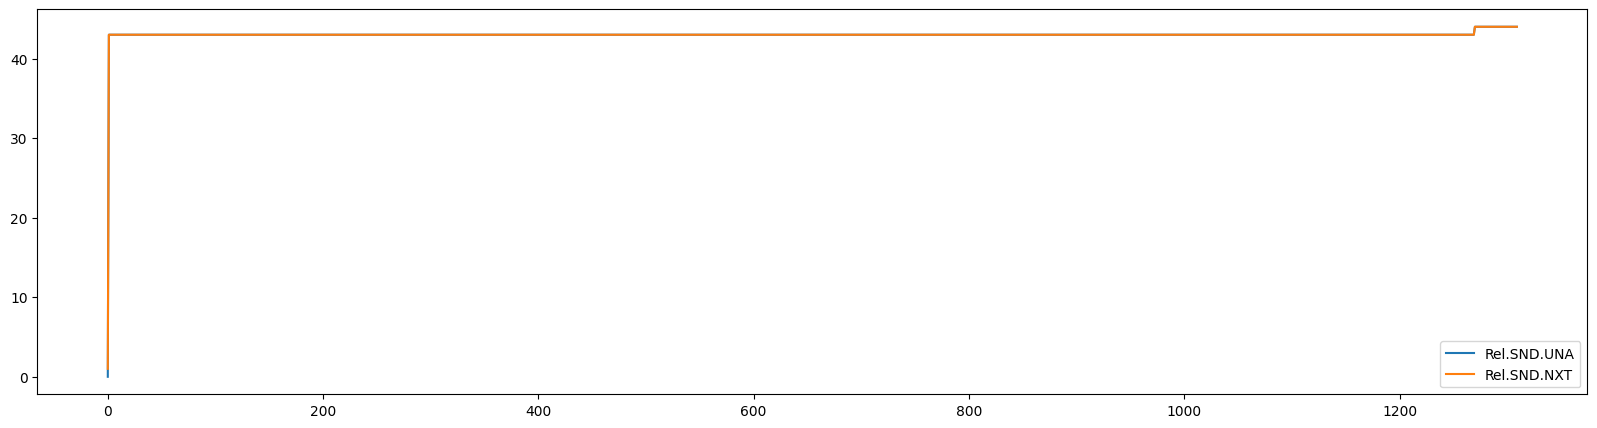

In [39]:
df.plot(y=['Rel.SND.UNA', 'Rel.SND.NXT'], figsize=(20, 5))
mp.show()

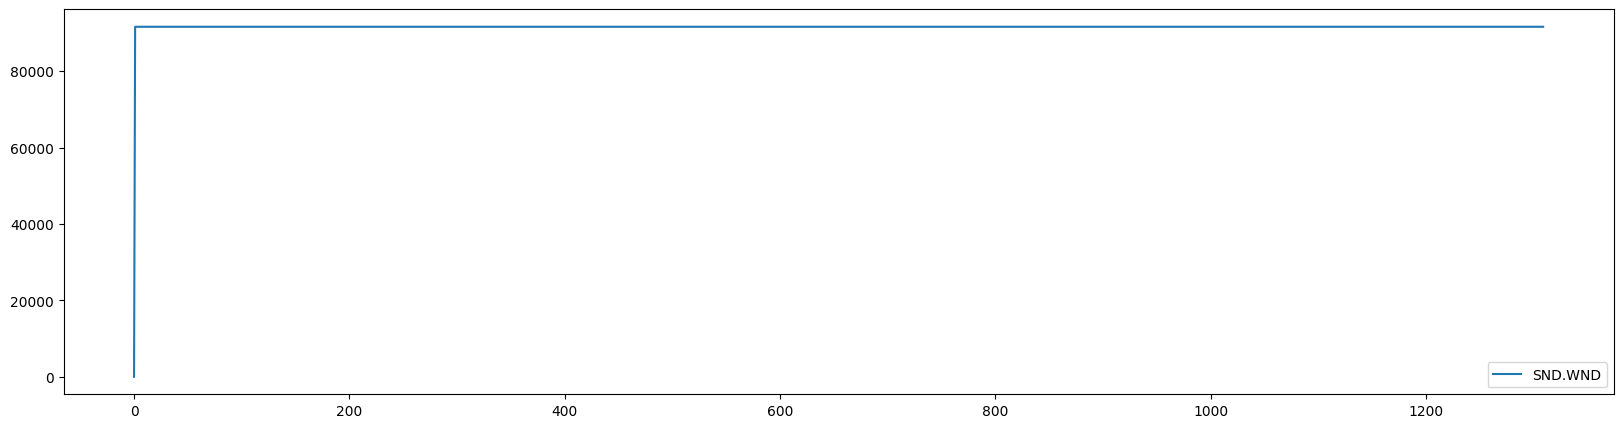

In [41]:
df.plot(y=['SND.WND'], figsize=(20, 5))
mp.show()

# RFC 9293: Receive Sequence Variables

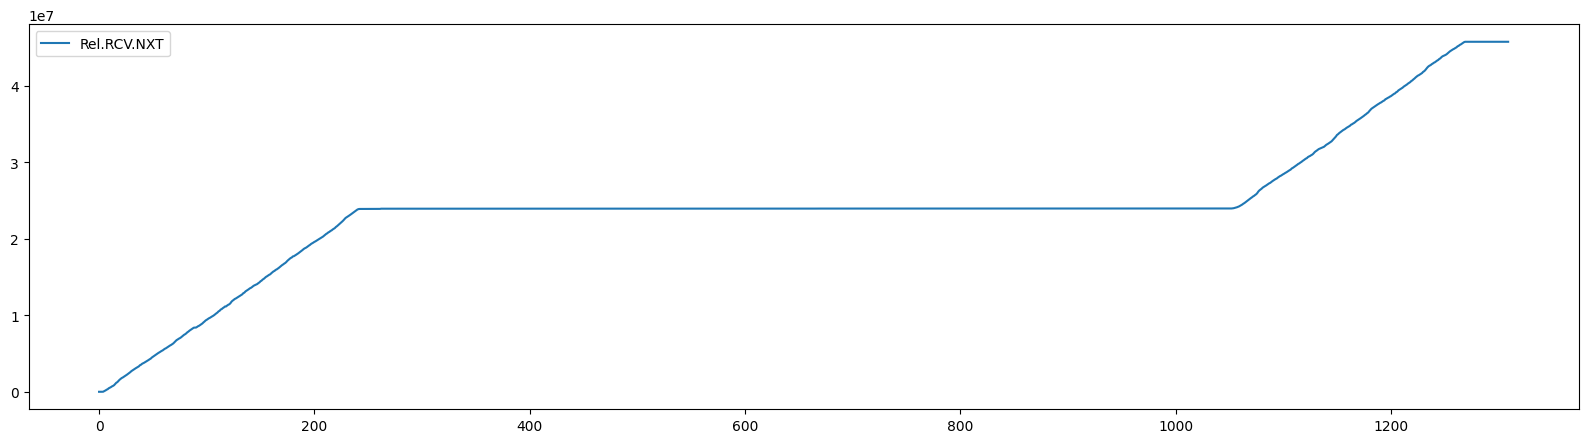

In [40]:
df.plot(y=['Rel.RCV.NXT'], figsize=(20, 5))
mp.show()

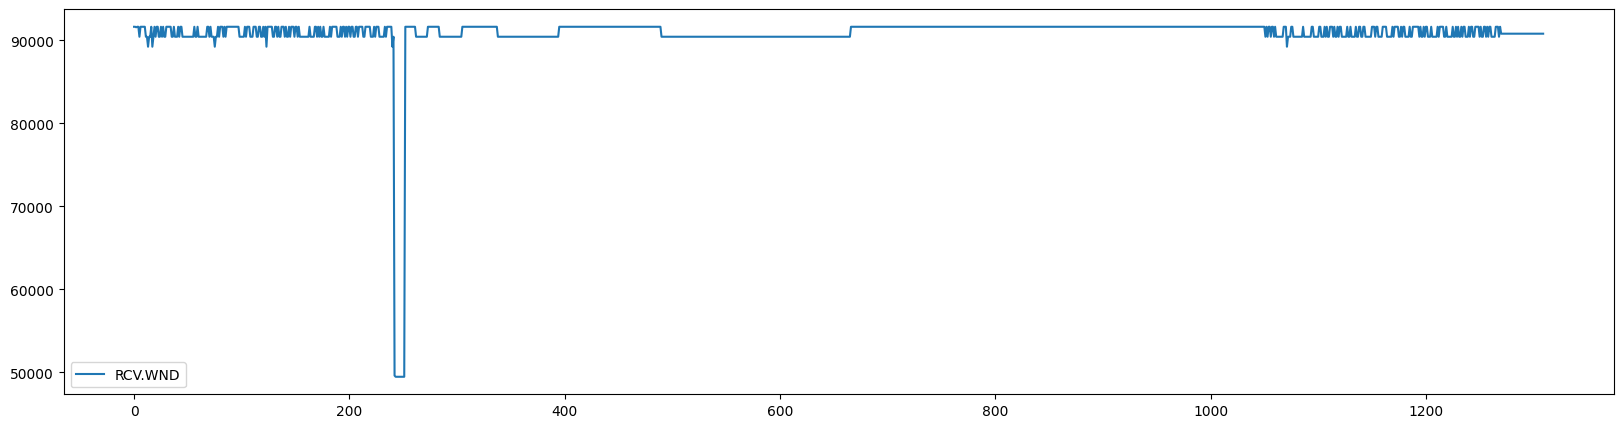

In [42]:
df.plot(y=['RCV.WND'], figsize=(20, 5))
mp.show()

# RFC 6298: Retransmission Timer Computation

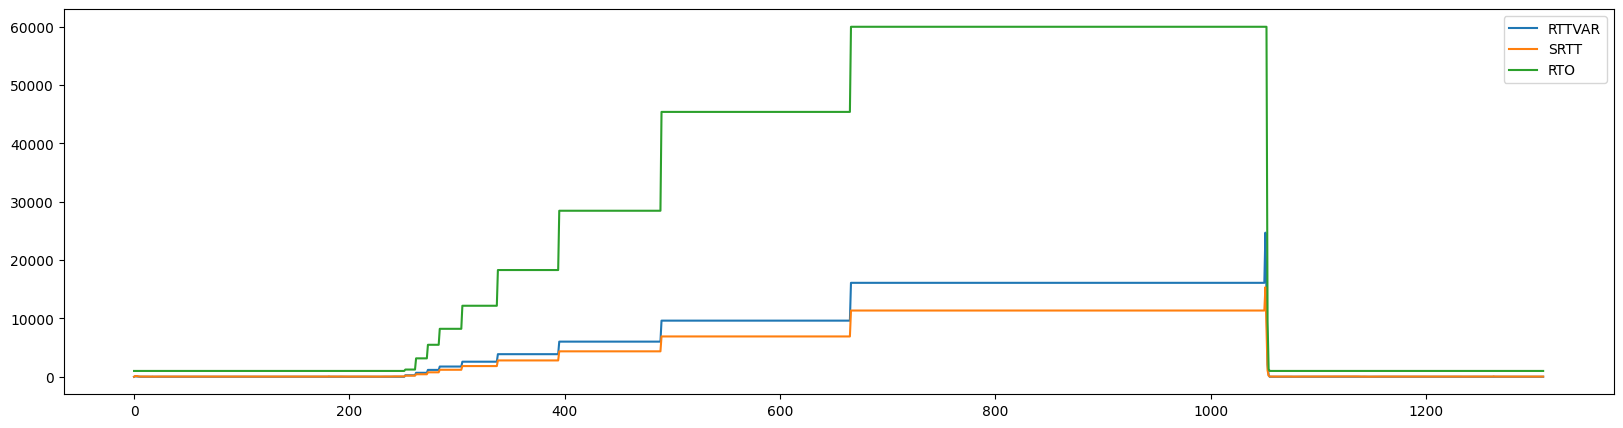

In [46]:
df.plot(y=['RTTVAR', 'SRTT', 'RTO'], figsize=(20, 5))
mp.show()

# RFC 5681: Congestion Control Algorithms

# Misc

<AxesSubplot: >

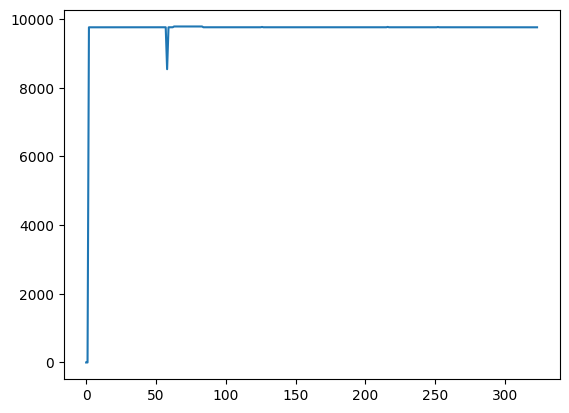

In [5]:
df['Unacknowledged Data'] = df['SND.NXT'] - df['SND.UNA']
df['Unacknowledged Data'].plot()

In [6]:
df['SND.WND'].describe()

count     324.0
mean     9760.0
std         0.0
min      9760.0
25%      9760.0
50%      9760.0
75%      9760.0
max      9760.0
Name: SND.WND, dtype: float64

<AxesSubplot: >

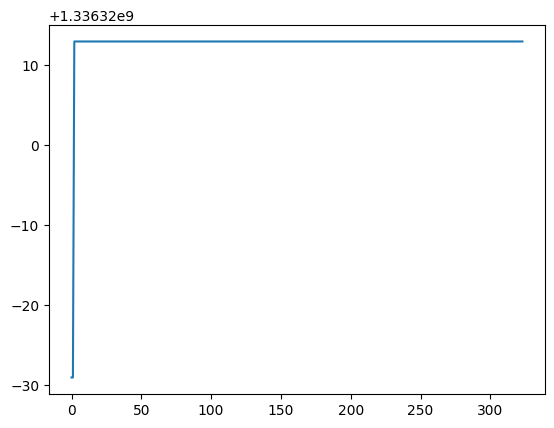

In [7]:
df['SND.WL1'].plot()

<AxesSubplot: >

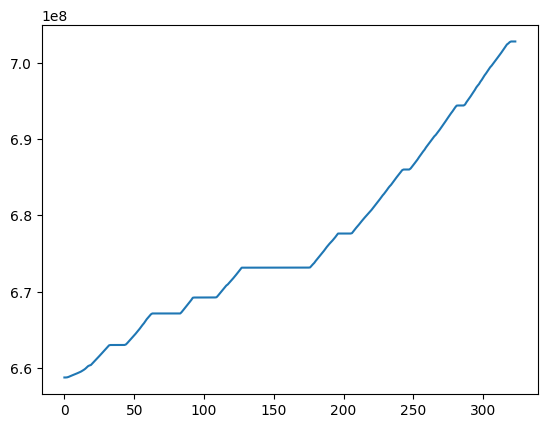

In [8]:
df['SND.WL2'].plot()

<AxesSubplot: >

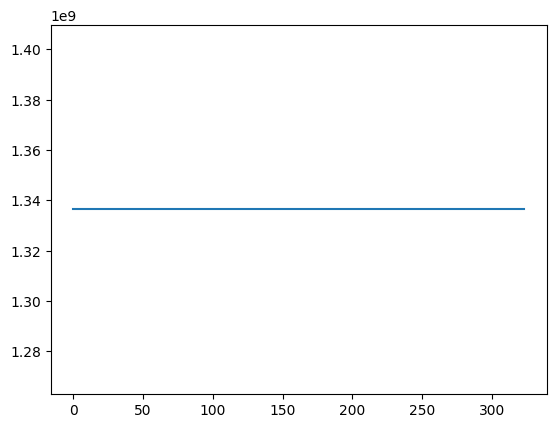

In [9]:
df['RCV.NXT'].plot()

<AxesSubplot: >

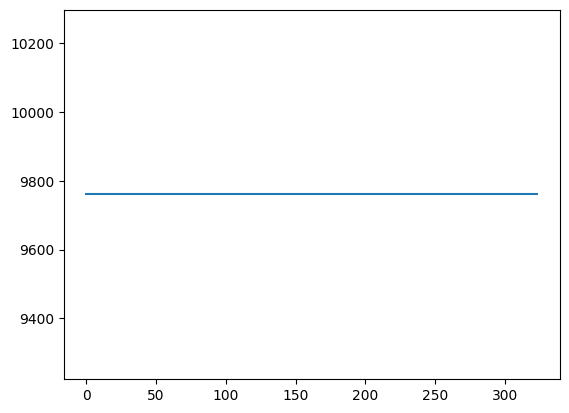

In [10]:
df['RCV.WND'].plot()